<font size="+3"><mark>Signal reconstruction benchmark / Interpreting the signal reconstruction</mark></font>

# Introduction

## README

_Associated GitHub repository: https://github.com/sylvaincom/astride._

- The reconstructed signals and the reconstruction errors must have already been computed.
- The reconstruction error is between the scaled signal and its reconstruction.
- After scaling, transformation, and inverse transformation, the signals are truncated before computing the error.
- The reconstructed signals must have been already computed!

## Imports

In [1]:
from pathlib import Path
cwd = Path.cwd()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from src.utils import load_ucr_dataset, concatenate_df
from src.utils_reconstruction import (
    load_reconstruction_errors, get_original_and_reconstructed_signals,
    plot_original_and_reconstructed_signals, plot_and_show_original_and_reconstructed_trunc_or_not_signals
)

## Configuration parameters

In [2]:
DATE_EXP = "2023_02_08"
EXPORT_FIG_BOOL = False

D_METHOD_NAMES_ABB = {
    "SAX": "sax",
    "1d-SAX": "onedsax",
    "SFA": "sfa",
    "ABBA": "abba",
    "ASTRIDE": "astride",
    "FASTRIDE": "fastride",
}

DENOMS = [3, 4, 5, 6, 10, 15, 20]
BIG_ERRORS_INDEX = 1000

In [3]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.set_theme()
cwd = Path.cwd()

# For plotly:
layout = go.Layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0, #top margin
    )
)

# Load the reconstruction errors

In [4]:
df_errors = load_reconstruction_errors(list_denoms=DENOMS, date_exp=DATE_EXP)

In [5]:
df_errors.head()

,method,signal_index,euclidean_error,dtw_error,denom,dataset,abba_tol,n_symbols,nsegments_abba,n_segments,n_samples,memory_usage_ratio_perc
0,SAX,0,3.139822,2.767765,3,ArrowHead,0.05,9,34,31,251,12.350598
1,SAX,1,3.087318,2.963532,3,ArrowHead,0.05,9,14,31,251,12.350598
2,SAX,2,3.145988,2.878219,3,ArrowHead,0.05,9,17,31,251,12.350598
3,SAX,3,3.486924,3.029083,3,ArrowHead,0.05,9,46,31,251,12.350598
4,SAX,4,2.760807,2.460788,3,ArrowHead,0.05,9,21,31,251,12.350598


# Comparison of the methods on a single signal

In [6]:
b_get_original_and_reconstructed_signals = get_original_and_reconstructed_signals(
    dataset_name_ucr="Beef",
    denom=20,
    d_method_names_abb=D_METHOD_NAMES_ABB,
    df_errors=df_errors,
    date_exp=DATE_EXP,
)

In [7]:
d_reconstructed_signals = b_get_original_and_reconstructed_signals.d_reconstructed_signals

n_segments = 19
Without truncation:


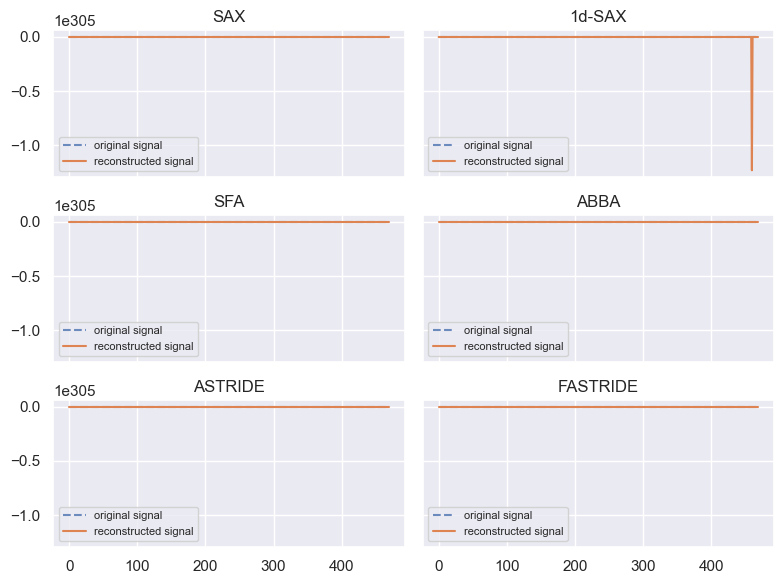

With truncation:


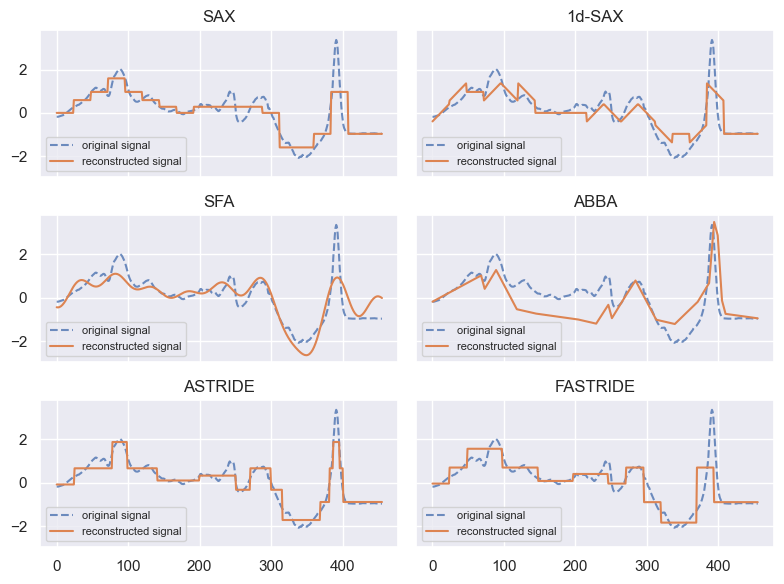

Reconstruction errors (with truncation):


,method,euclidean_error,dtw_error
832334,SAX,9.9,7.7
832364,1d-SAX,10.7,6.9
832394,SFA,10.7,8.4
832424,ABBA,18.1,7.7
832454,ASTRIDE,6.0,5.9
832484,FASTRIDE,11.5,8.6


In [8]:
plot_and_show_original_and_reconstructed_trunc_or_not_signals(
    b_get_original_and_reconstructed_signals=b_get_original_and_reconstructed_signals,
    df_errors=df_errors,
    signal_index=2,
    is_savefig_trunc=False,
)

*Note*: It corresponds to Figure 8 of the paper.